In [434]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ***Chapter-1: Parameter estimation by optimization***

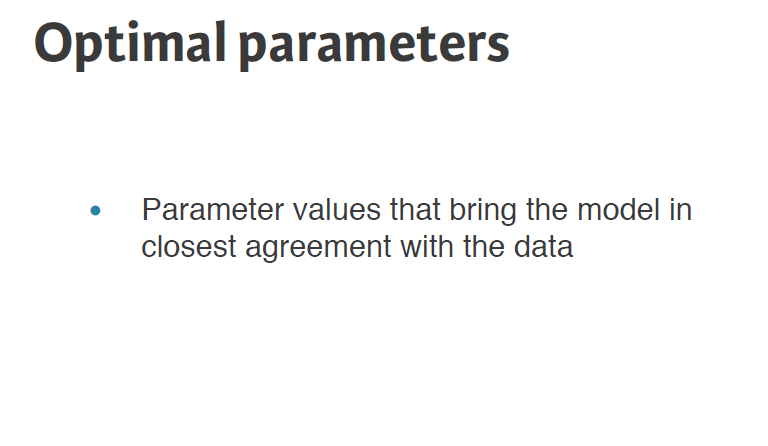

In [435]:
import numpy as np
import pandas as pd

In [436]:
df_nohitter=pd.read_csv('/content/gdrive/MyDrive/mlb_nohitters.csv')
df_nohitter.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


**How often do we get no-hitters?**

In [437]:
nohitter_times=df_nohitter['game_number'].diff()
nohitter_times.head()

0      NaN
1    895.0
2     11.0
3    131.0
4      2.0
Name: game_number, dtype: float64

In [438]:
tau=np.mean(nohitter_times)

In [439]:
nohitter_times_inter=np.random.exponential(tau,size=10000)

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

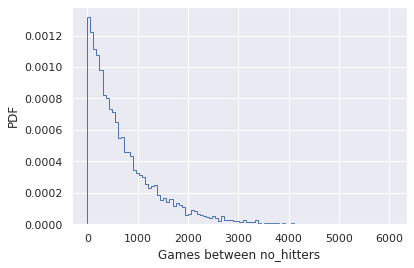

In [441]:
plt.hist(nohitter_times_inter,density=True,histtype='step',bins=100)
plt.xlabel("Games between no_hitters")
plt.ylabel("PDF")
plt.show()

**Do the data follow our story?**

In [442]:
def ecdf(data):
  n=len(data)

  x=np.sort(data)

  y=np.arange(1,n+1)/n

  return x,y

In [443]:
x,y=ecdf(nohitter_times)

In [444]:
x_ther,y_ther=ecdf(nohitter_times_inter)

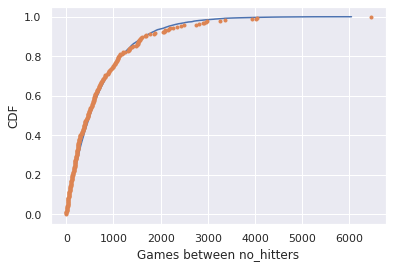

In [445]:
plt.plot(x_ther,y_ther)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel("Games between no_hitters")
plt.ylabel("CDF")
plt.show()

**How is this parameter optimal?**

In [446]:
sample_half=np.random.exponential(tau/2,10000)

In [447]:
sample_double=np.random.exponential(2*tau,10000)

In [448]:
x_half,y_half=ecdf(sample_half)

In [449]:
x_double,y_double=ecdf(sample_double)

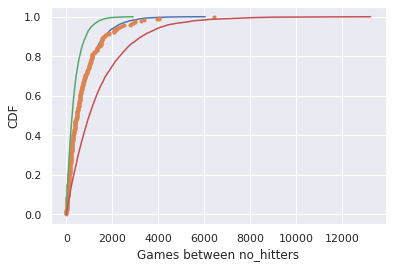

In [450]:
plt.plot(x_ther,y_ther)
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x_half,y_half)
plt.plot(x_double,y_double)
plt.xlabel("Games between no_hitters")
plt.ylabel("CDF")
plt.show()

*The value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.*

**Linear regression
by least squares**

**Least Square is** *the process of finding the parameters for which
the sum of the squares of the residuals is minimal*

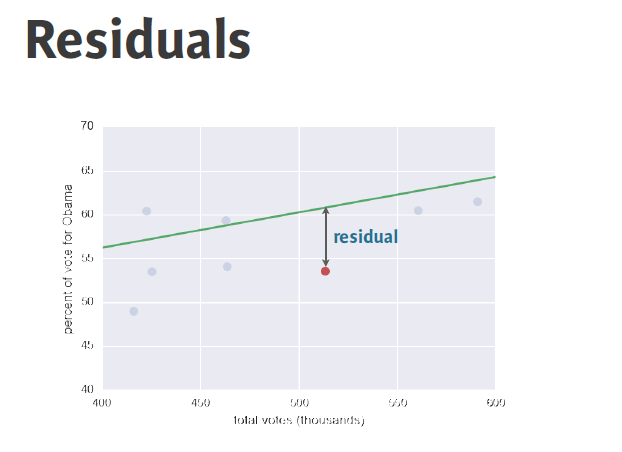

In [451]:
df_all_states=pd.read_csv('/content/gdrive/MyDrive/2008_all_states.csv')
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [452]:
slope,intercept=np.polyfit(df_all_states['total_votes'],df_all_states['dem_share'],1)
slope,intercept

(3.3705536864531573e-05, 40.808790535847685)

In [453]:
df_female=pd.read_csv('/content/gdrive/MyDrive/female_literacy_fertility.csv')
df_female.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


EDA of literacy/fertility data

In [454]:
def pearson_r(x,y):
  corr_mat=np.corrcoef(x,y)
  correlation=corr_mat[0,1]

  return correlation

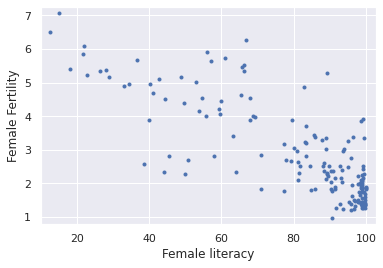

In [455]:
plt.plot(df_female['female literacy'],df_female['fertility'],marker='.',linestyle='none')
plt.margins(0.03)
plt.xlabel("Female literacy")
plt.ylabel("Female Fertility")
plt.show()

In [456]:
pearson_r(df_female['female literacy'],df_female['fertility'])

-0.8041324026815341

EDA of Iliteracy/fertility data

In [457]:
df_female['Iliteracy']=100-df_female['female literacy']

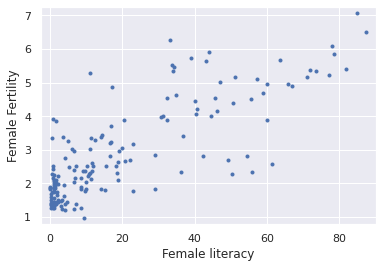

In [458]:
plt.plot(df_female['Iliteracy'],df_female['fertility'],marker='.',linestyle='none')
plt.margins(0.03)
plt.xlabel("Female literacy")
plt.ylabel("Female Fertility")
plt.show()

In [459]:
pearson_r(df_female['Iliteracy'],df_female['fertility'])

0.8041324026815344

Linear regression

In [460]:
slope,intercept=np.polyfit(df_female['Iliteracy'],df_female['fertility'],1)
slope,intercept

(0.04979854809063423, 1.8880506106365567)

In [461]:
# Make theoretical line to plot

x=np.array([0,100])
y=slope*x + intercept

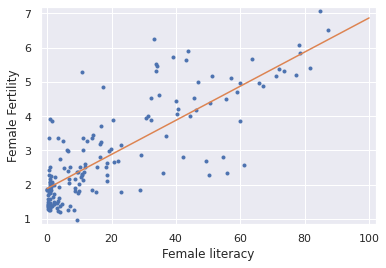

In [462]:
plt.plot(df_female['Iliteracy'],df_female['fertility'],marker='.',linestyle='none')
plt.margins(0.02)
plt.plot(x,y)
plt.xlabel("Female literacy")
plt.ylabel("Female Fertility")
plt.show()

**How is it optimal?**

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

In [463]:
slope_val=np.linspace(0,0.1,200)

In [464]:
rss=np.empty_like(slope_val)

In [465]:
for i, slope in enumerate(slope_val):
  rss[i]=np.sum((df_female['fertility'] - slope*df_female['Iliteracy'] - intercept) ** 2) # np.sum((y_data - a * x_data - b)**2) 
                       

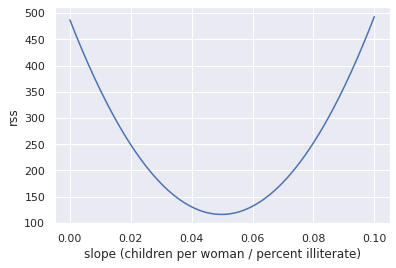

In [466]:
plt.plot(slope_val,rss,'-')
plt.xlabel("slope (children per woman / percent illiterate)")
plt.ylabel("rss")
plt.show()

*The minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.*

**The importance of
EDA: Anscombe's
quartet**

In [467]:
df_anscombe=pd.read_csv('/content/gdrive/MyDrive/anscombe.csv')
df_anscombe.head()

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84


In [468]:
df_anscombe=pd.read_csv('/content/gdrive/MyDrive/anscombe.csv',header=1)
df_anscombe.head()

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [469]:
a,b=np.polyfit(df_anscombe['x'],df_anscombe['y'],1)
print(a,b)

0.5000909090909094 3.000090909090908


In [470]:
x=np.array([3,15])
y=a*x+b

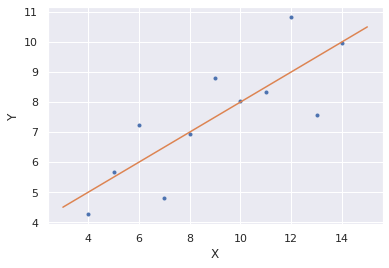

In [471]:
plt.plot(df_anscombe['x'],df_anscombe['y'],marker='.',linestyle='none')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

In [472]:
df_anscombe.x.min(),df_anscombe.y.min()

(4.0, 4.26)

**Linear regression on all Anscombe data**

In [473]:
df_anscombe.columns

Index(['x', 'y', 'x.1', 'y.1', 'x.2', 'y.2', 'x.3', 'y.3'], dtype='object')

Slope: 0.5000909090909094 Intercept: 3.000090909090908 Residual: 13.762689999999997


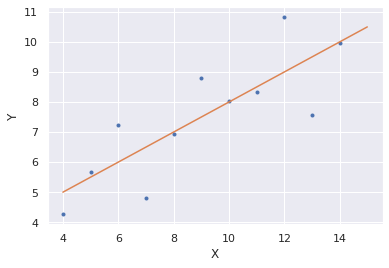

Slope: 0.5000000000000003 Intercept: 3.0009090909090905 Residual: 13.776290909090907


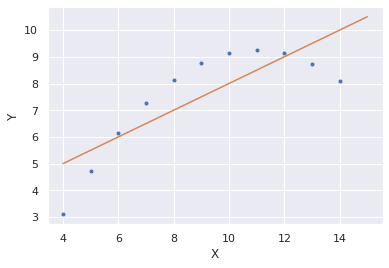

Slope: 0.49972727272727313 Intercept: 3.002454545454545 Residual: 13.756191818181822


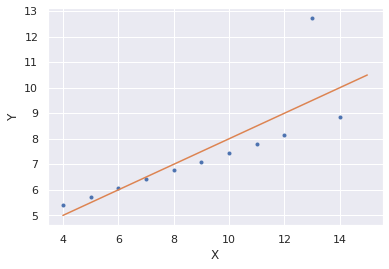

Slope: 0.4999090909090908 Intercept: 3.0017272727272735 Residual: 13.742490000000002


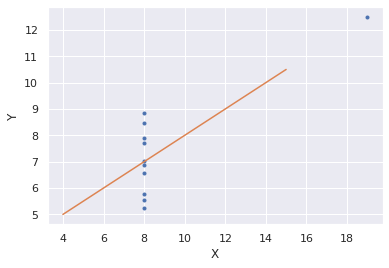

In [474]:
for x, y in zip([df_anscombe['x'],df_anscombe['x.1'],df_anscombe['x.2'],df_anscombe['x.3']],[df_anscombe['y'],df_anscombe['y.1'],df_anscombe['y.2'],df_anscombe['y.3']]):
  a, b=np.polyfit(x,y,1)

  a_val=np.linspace(0,0.1,15)
  rss=np.empty_like(a_val)

  for i, slope in enumerate(a_val):
    rss[i]=np.sum((y - a*x - b) ** 2) # np.sum((y_data - a * x_data - b)**2)

  print("Slope:", a, "Intercept:",b,"Residual:",np.mean(rss))
    
  n=np.array([4,15])
  m=a*n+b

  plt.plot(x,y,marker='.',linestyle='none')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.plot(n,m)
  plt.show()

*All slope,intercept and residual are almost equal*

# ***Chapter-2: Bootstrap confidence intervals***

**Generating
bootstrap
replicates**

**Bootstrapping:** *The use of resampled data to
perform statistical inference*

**Bootstrap sample:** *A resampled array of the data*

**Bootstrap replicate:** *A statistic computed from a resampled array*

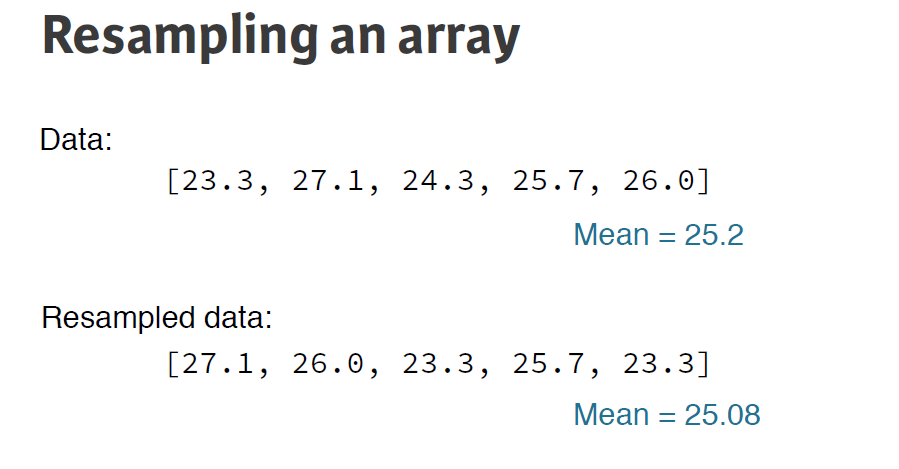

In [475]:
a=np.array([1,2,3,4,5])
a.mean()

3.0

In [476]:
b_a=np.random.choice([1,2,3,4,5],size=5)
b_a

array([1, 4, 3, 1, 5])

In [477]:
b_a.mean()

2.8

In [478]:
df_michelson=pd.read_csv('/content/gdrive/MyDrive/michelson_speed_of_light.csv')
df_michelson.head()

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [479]:
np.mean(df_michelson['velocity of light in air (km/s)'])

299852.4

In [480]:
np.mean(np.random.choice(df_michelson['velocity of light in air (km/s)'],size=len(df_michelson['velocity of light in air (km/s)'])))

299844.2

*Also can use for median and std*

**Visualizing bootstrap samples**

In [481]:
df_weather=pd.read_csv('/content/gdrive/MyDrive/sheffield_weather_station.csv',sep = '\s+', header = 8)
df_weather.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


In [482]:
df_weather.shape

(1602, 7)

In [483]:
bs_rain=np.random.choice(df_weather['rain'],size=len(df_weather['rain']))

In [484]:
x_bs,y_bs=ecdf(bs_rain)

Text(0, 0.5, 'ECDF')

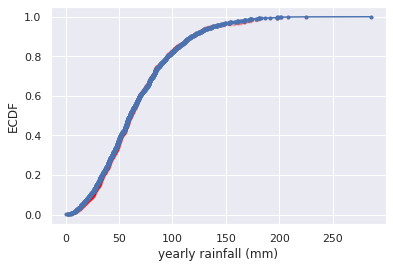

In [485]:
plt.plot(x_bs,y_bs,marker ='.',linestyle ='none',color ='red', alpha =0.1)

x,y=ecdf(df_weather['rain'])
plt.plot(x,y,marker='.')
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

**Generating many bootstrap replicates**

In [486]:
def boostrap_replicate(data,func):
  return func(np.random.choice(data, size=len(data)))

In [487]:
def draw_reps(data,func,size=1):
  bs_replicates=np.empty(size)

  for i in range(size):
    bs_replicates[i]=boostrap_replicate(data,func)

  return bs_replicates

In [488]:
np.mean(boostrap_replicate(df_michelson['velocity of light in air (km/s)'],np.mean))

299855.9

In [489]:
np.mean(boostrap_replicate(df_michelson['velocity of light in air (km/s)'],np.mean))

299852.1

In [490]:
np.mean(boostrap_replicate(df_michelson['velocity of light in air (km/s)'],np.mean))

299861.2

In [491]:
bs_rep=draw_reps(df_michelson['velocity of light in air (km/s)'],np.mean,10000)

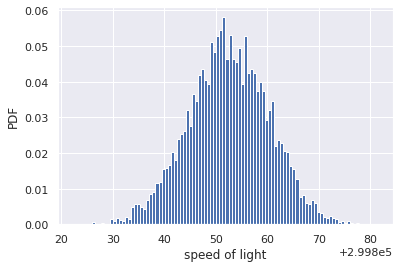

In [492]:
plt.hist(bs_rep,density=True,bins=100)
plt.xlabel("speed of light")
plt.ylabel("PDF")
plt.show()

**Bootstrap replicates of the mean and the SEM(Standard Error of Mean)**

In [493]:
bs_rep=draw_reps(df_weather['rain'],np.mean,size=10000)
np.mean(bs_rep)

66.74629331460675

In [494]:
np.std(bs_rep)

0.9510638792555673

In [495]:
sem=np.std(df_weather['rain']) / np.sqrt(len(df_weather['rain']))
sem

0.9488593574676786

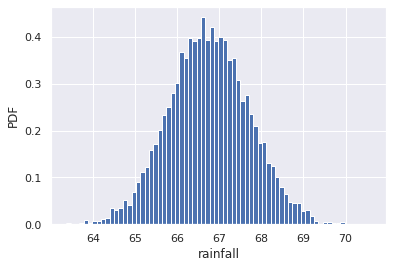

In [496]:
plt.hist(bs_rep,density=True,bins=70)
plt.xlabel("rainfall")
plt.ylabel("PDF")
plt.show()

**Bootstrap replicates of other statistics**

In [497]:
bs_light=draw_reps(df_michelson['velocity of light in air (km/s)'],np.var,size=10000)

In [498]:
np.std(bs_light)

932.835789955458

In [499]:
np.mean(bs_light)

6120.447029000001

In [500]:
sem=np.std(df_michelson['velocity of light in air (km/s)'])/np.sqrt(len(df_michelson['velocity of light in air (km/s)']))
sem

7.861450247886843

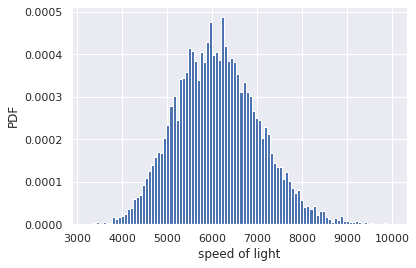

In [501]:
plt.hist(bs_light,density=True,bins=100,histtype='bar')
plt.xlabel("speed of light")
plt.ylabel("PDF")
plt.show()

Text(0, 0.5, 'PDF')

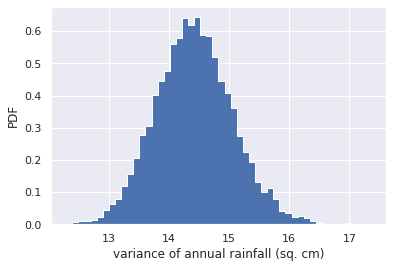

In [502]:
bs_replicates = draw_reps(df_weather['rain'], np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates =  bs_replicates / 100

plt.hist(bs_replicates, density = True, bins = 50,histtype='stepfilled')
plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

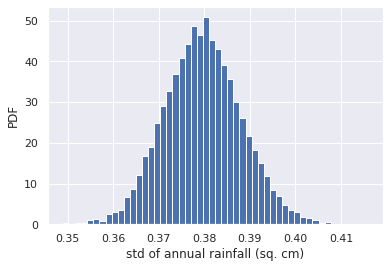

In [503]:
bs_replicates = draw_reps(df_weather['rain'], np.std, 10000)

# Put the variance in units of square centimeters
bs_replicates =  bs_replicates / 100

plt.hist(bs_replicates, density = True, bins = 50,histtype='barstacked')
plt.xlabel('std of annual rainfall (sq. cm)')
plt.ylabel('PDF')

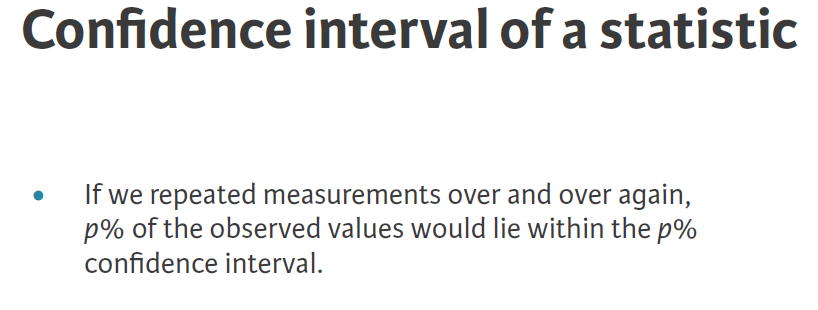

In [504]:
bs_light=draw_reps(df_michelson['velocity of light in air (km/s)'],np.mean,size=10000)

In [505]:
conf_int=np.percentile(bs_light,[2.5,97.5])
conf_int

array([299836.8   , 299868.2025])

95% confidence interval = [299836.8    299868.2025] light speed


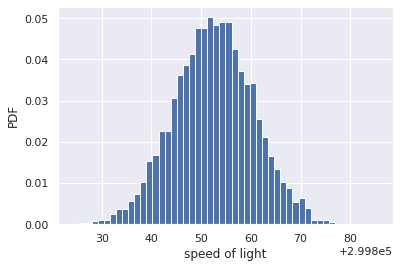

In [506]:
print('95% confidence interval =', conf_int, 'light speed')


plt.hist(bs_light,density=True,bins=50,histtype='bar')
plt.xlabel("speed of light")
plt.ylabel("PDF")
plt.show()

**Confidence interval on the rate of no-hitters**

In [507]:
df_nohitter.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [508]:
nohitter_times=df_nohitter['game_number'].diff()
nohitter_times.head()

0      NaN
1    895.0
2     11.0
3    131.0
4      2.0
Name: game_number, dtype: float64

In [509]:
bs_no_hitter=draw_reps(nohitter_times,np.mean,size=10000)

In [510]:
con_int_nohit=np.percentile(bs_no_hitter,[2.5,97.5])
print(con_int_nohit)

[nan nan]


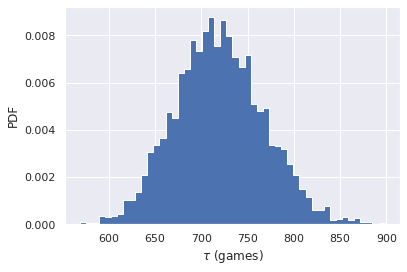

In [511]:
plt.hist(bs_no_hitter, bins=50, density=True,histtype='stepfilled')
plt.xlabel(r'$\tau$ (games)')
plt.ylabel('PDF')
plt.show()

**Pairs bootstrap and Linear Regression**

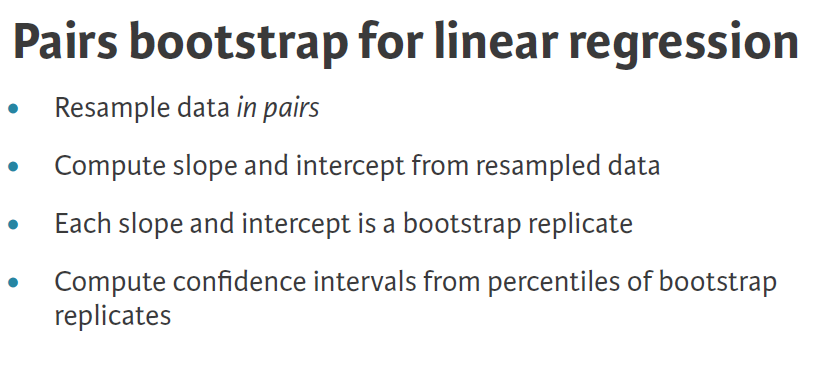

**Generating a pairs bootstrap sample**

In [512]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [513]:
df_swing=pd.read_csv('/content/gdrive/MyDrive/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [514]:
inds=np.arange(len(df_swing['total_votes']))

In [515]:
bs_inds=np.random.choice(inds,len(inds))

In [516]:
bs_total_votes=df_swing['total_votes'][bs_inds]

In [517]:
bs_dem_share=df_swing['dem_share'][bs_inds]

In [518]:
bs_slope,bs_intercept=np.polyfit(bs_total_votes,bs_dem_share,1)

In [519]:
bs_slope,bs_intercept

(3.858025236059167e-05, 40.196870018065376)

In [520]:
org_slope,org_intercept=np.polyfit(df_swing['total_votes'],df_swing['dem_share'],1)

In [521]:
org_slope,org_intercept

(4.0370717009465616e-05, 40.11391196864175)

In [522]:
df_swing['total_votes'].min(),df_swing['total_votes'].max()

(2245, 863486)

In [523]:
df_swing['dem_share'].min(),df_swing['dem_share'].max()

(6.8, 83.56)

In [524]:
bs_x=np.array([6,1000000])
bs_y=bs_slope*bs_x + bs_intercept

In [525]:
org_x=np.array([6,1000000])
org_y=org_slope*org_x + org_intercept

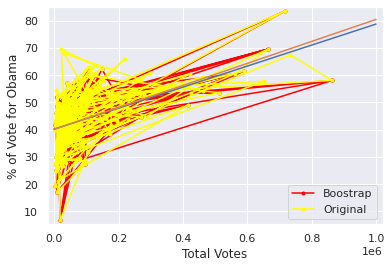

In [526]:
plt.plot(bs_total_votes,bs_dem_share,marker='.',color='red')
plt.plot(df_swing['total_votes'],df_swing['dem_share'],marker='.',color='yellow')
plt.plot(bs_x,bs_y)
plt.plot(org_x,org_y)
plt.legend(('Boostrap','Original'),loc='lower right')
plt.xlabel('Total Votes')
plt.ylabel('% of Vote for Obama')
plt.margins(0.02)
plt.show()

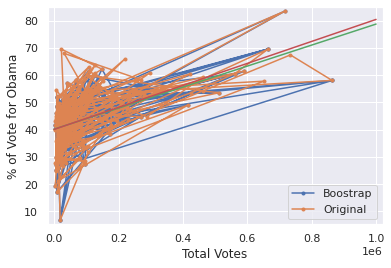

In [527]:
plt.plot(bs_total_votes,bs_dem_share,marker='.')
plt.plot(df_swing['total_votes'],df_swing['dem_share'],marker='.')
plt.plot(bs_x,bs_y)
plt.plot(org_x,org_y)
plt.legend(('Boostrap','Original'),loc='lower right')
plt.xlabel('Total Votes')
plt.ylabel('% of Vote for Obama')
plt.margins(0.02)
plt.show()

**A function to do pairs bootstrap**

In [528]:
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))

    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

**Pairs bootstrap of literacy/fertility data**

[0.04430011 0.05556074]


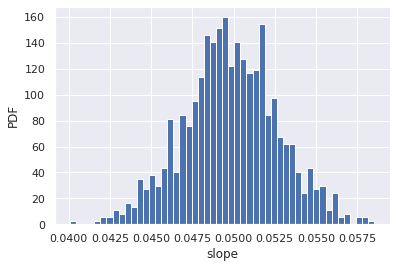

In [529]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df_female['Iliteracy'], df_female['fertility'], 1000)

print(np.percentile(bs_slope_reps, [2.5, 97.5]))

plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

**Plotting bootstrap regressions**

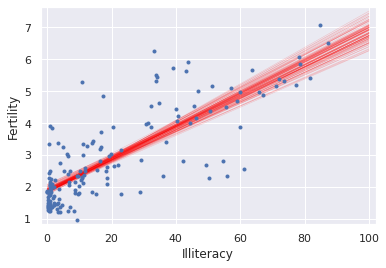

In [530]:
x = np.array([0, 100])

for i in range(100):
  plt.plot(x,bs_slope_reps[i]*x + bs_intercept_reps[i],linewidth=0.5, alpha=0.2, color='red')

plt.plot(df_female['Iliteracy'], df_female['fertility'], marker = '.', linestyle = 'none')
plt.xlabel('Illiteracy')
plt.ylabel('Fertility')
plt.margins(0.02)

# ***Chapter-3: Introduction to hypothesis testing***

**Formulating and
simulating
hypotheses**

*Assessment of how reasonable the observed data
are assuming a hypothesis is true. Another name for the hypothesis you are testing is called* **Null Hypothesis**

**Permutation:** *Random reordering of entries in an array*

Generating a permutation sample

In [531]:
def permutation_sample(data1,data2):
  data=np.concatenate((data1,data2))

  perm_data=np.random.permutation(data)

  perm_1=perm_data[:len(data1)]
  perm_2=perm_data[len(data1):]

  return perm_1,perm_2

In [532]:
perm_1,perm_2=permutation_sample(df_swing[df_swing['state'] == 'PA']['dem_share'],df_swing[df_swing['state'] == 'OH']['dem_share'])

In [533]:
print(perm_1,perm_2)

[57.01 37.62 40.18 48.73 45.26 38.01 31.56 47.61 44.71 36.11 29.07 39.84
 54.74 56.24 69.64 39.92 28.79 42.49 33.56 39.67 40.64 32.97 31.04 42.2
 54.59 53.14 46.07 54.58 33.57 53.16 50.36 53.61 38.23 46.85 61.48 54.66
 31.47 55.97 40.1  45.6  49.85 43.82 63.57 50.96 47.43 31.75 47.87 27.92
 50.1  53.53 43.12 50.46 38.25 51.28 43.78 43.92 60.08 40.09 40.45 54.25
 83.56 41.21 44.08 47.47 42.97 45.88 47.01] [39.86 48.36 44.69 35.71 37.53 46.15 35.47 45.45 52.2  46.29 35.22 43.05
 58.36 36.06 40.47 41.97 49.79 28.94 46.73 48.76 38.62 42.65 38.1  48.61
 68.02 41.56 43.43 34.01 39.43 49.81 58.23 52.4  47.75 38.96 36.43 36.54
 36.71 32.12 41.32 38.53 38.07 60.49 45.31 49.58 34.84 44.03 36.07 42.38
 48.62 39.26 54.64 49.44 48.46 42.23 44.9  41.77 40.67 60.81 63.1  43.18
 46.33 25.34 36.05 43.11 65.99 48.56 46.39 56.94 40.11 52.76 34.58 37.77
 59.1  37.26 54.37 40.24 32.88 57.81 46.33 37.72 51.38 45.89  6.8  57.88
 27.32 41.55 38.11 60.5 ]


Visualizing permutation sampling

In [534]:
perm_1x,perm_1y=ecdf(perm_1)
perm_2x,perm_2y=ecdf(perm_2)

In [535]:
org1_x,org1_y=ecdf(df_swing[df_swing['state'] == 'PA']['dem_share'])
org2_x,org2_y=ecdf(df_swing[df_swing['state'] == 'OH']['dem_share'])

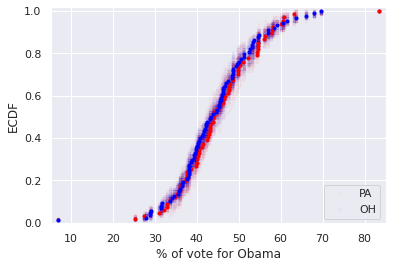

In [536]:
for i in range(50):
  perm_1,perm_2=permutation_sample(df_swing[df_swing['state'] == 'PA']['dem_share'],df_swing[df_swing['state'] == 'OH']['dem_share'])
  perm_1x,perm_1y=ecdf(perm_1)
  perm_2x,perm_2y=ecdf(perm_2)

  plt.plot(perm_1x,perm_1y,marker='.',linestyle='none',color='red',alpha=0.02)
  plt.plot(perm_2x,perm_2y,marker='.',linestyle='none',color='blue',alpha=0.02)


plt.plot(org1_x,org1_y,marker='.',linestyle='none',color='red')
plt.plot(org2_x,org2_y,marker='.',linestyle='none',color='blue')

plt.xlabel("% of vote for Obama")
plt.ylabel("ECDF")

plt.margins(0.02)
plt.legend(('PA','OH'),loc='lower right')
plt.show()

In [537]:
df_weather.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


In [538]:
org1_x,org1_y=ecdf(df_weather[df_weather['mm'] == 6]['rain'])
org2_x,org2_y=ecdf(df_weather[df_weather['mm'] == 11]['rain'])

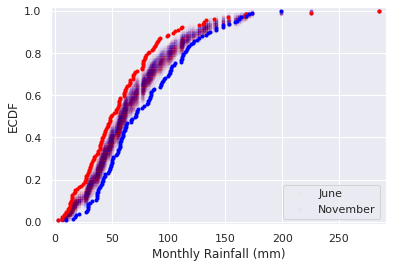

In [539]:
for i in range(50):
  perm_1,perm_2=permutation_sample(df_weather[df_weather['mm'] == 6]['rain'],df_weather[df_weather['mm'] == 11]['rain'])
  perm_1x,perm_1y=ecdf(perm_1)
  perm_2x,perm_2y=ecdf(perm_2)

  plt.plot(perm_1x,perm_1y,marker='.',linestyle='none',color='red',alpha=0.02)
  plt.plot(perm_2x,perm_2y,marker='.',linestyle='none',color='blue',alpha=0.02)


plt.plot(org1_x,org1_y,marker='.',linestyle='none',color='red')
plt.plot(org2_x,org2_y,marker='.',linestyle='none',color='blue')

plt.xlabel("Monthly Rainfall (mm)")
plt.ylabel("ECDF")

plt.margins(0.02)
plt.legend(('June','November'),loc='lower right')
plt.show()


**Test statistics
and p-values**

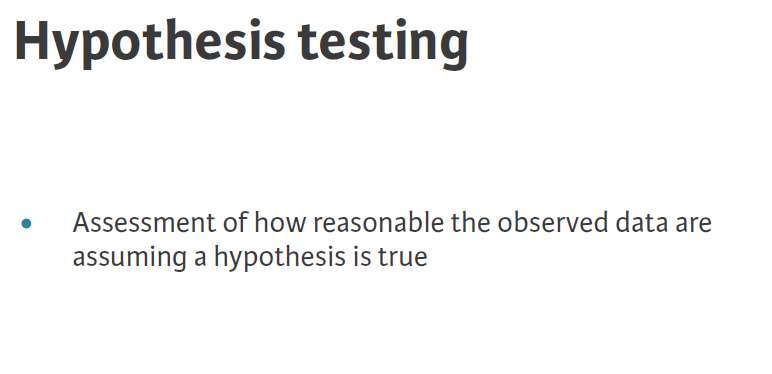

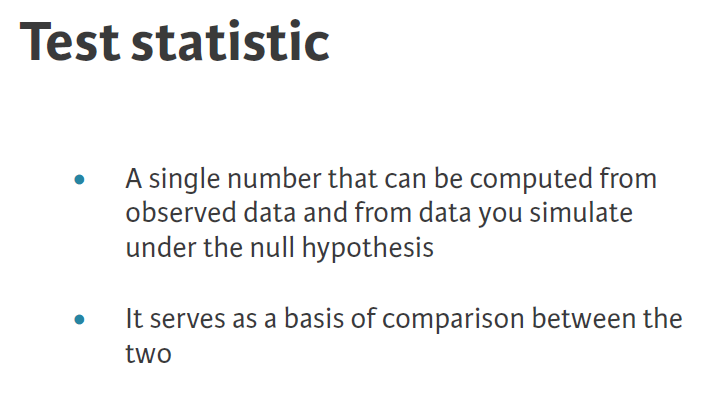

In [540]:
np.mean(perm_1)-np.mean(perm_2)

2.62364493322859

In [541]:
np.mean(df_weather[df_weather['mm'] == 6]['rain']) - np.mean(df_weather[df_weather['mm'] == 11]['rain'])

-20.575182358882266

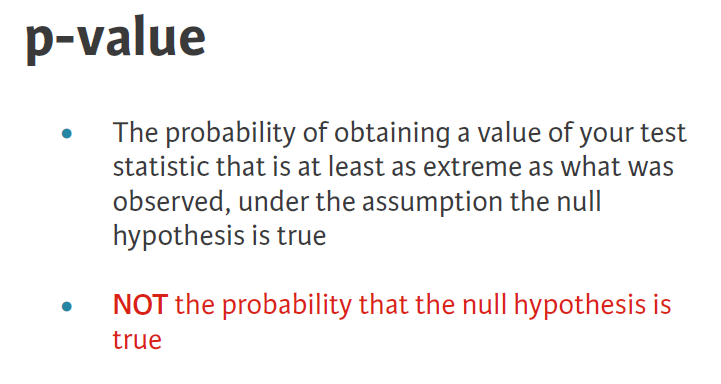

**Generating permutation replicates**

In [542]:
def draw_perm_reps(d1,d2,func,size=1):
  perm_replicates=np.empty(size)

  for i in range(size):
    perm_sample_1,perm_sample_2=permutation_sample(d1,d2)

    perm_replicates[i]=func(perm_sample_1,perm_sample_2)

  return perm_replicates

**Look before you leap: EDA before hypothesis testing**

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

In [543]:
df_frog=pd.read_csv('/content/gdrive/MyDrive/frog_tongue.csv',header=14)
df_frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [544]:
df_frog['ID'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

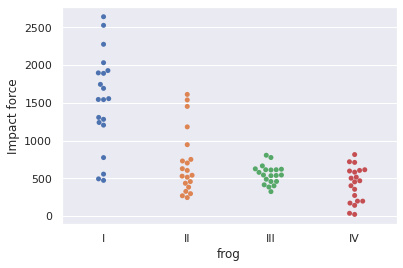

In [545]:
sns.swarmplot(x='ID',y='impact force (mN)',data=df_frog)
plt.xlabel('frog')
plt.ylabel('Impact force')
plt.show()

Permutation test-

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b

In [546]:
def diff_of_means(d1,d2):
  diff=np.mean(d1) - np.mean(d2)

  return diff 

In [547]:
force_a = df_frog[df_frog['ID'] == 'I']['impact force (mN)']
force_b = df_frog[df_frog['ID'] == 'II']['impact force (mN)']

In [548]:
empirical_diff_means=diff_of_means(force_a,force_b)
empirical_diff_means

822.85

In [549]:
perm_replicates=draw_perm_reps(force_a,force_b,diff_of_means,size=10000)

In [550]:
p=np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0

**Bootstrap
hypothesis tests**

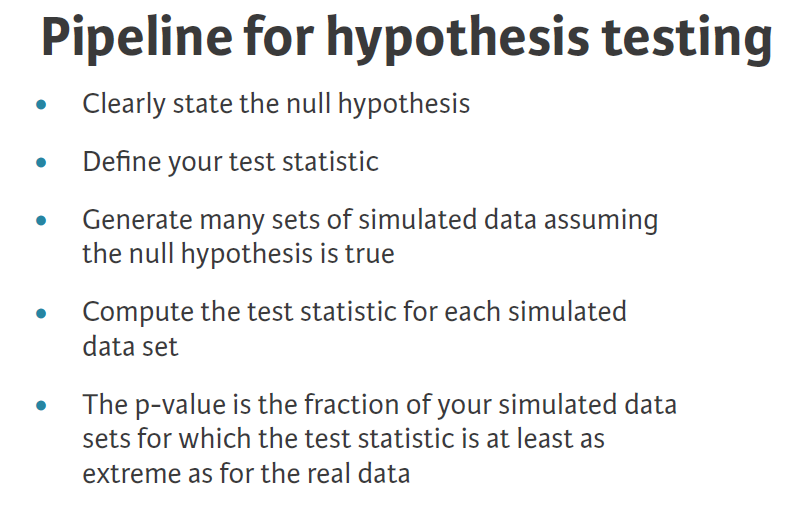

**A one-sample bootstrap hypothesis test**

**Null hypothesis** *is the true mean speed of light in Michelson’s
experiments was actually Newcomb's reported value*

In [551]:
newcomb=299860

In [552]:
michelson_shift=df_michelson['velocity of light in air (km/s)'] - np.mean(df_michelson['velocity of light in air (km/s)']) + newcomb

In [553]:
bs_replicates=draw_reps(michelson_shift,np.mean,10000)

In [554]:
p=np.sum(bs_replicates >= np.mean(df_michelson['velocity of light in air (km/s)'])) / 10000
p

0.8371

In [555]:
def diff_from_another(data1,data2):
  return np.mean(data1) - data2

In [556]:
diff_obs=diff_from_another(df_michelson['velocity of light in air (km/s)'],299860)
diff_obs

-7.599999999976717

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [557]:

translated_force_b=force_b - np.mean(force_b) + 550

bs_replicates=draw_reps(translated_force_b, np.mean, 10000)

p=np.sum(bs_replicates <= np.mean(force_b)) / 10000

print('p = ', p)

p =  0.949


**A two-sample bootstrap hypothesis test for difference of means**

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

In [558]:
forces_concat = pd.concat([force_a, force_b])

In [559]:
empirical_diff_means=diff_of_means(force_a,force_b)
empirical_diff_means

822.85

In [560]:
mean_force=np.mean(forces_concat)

In [561]:
force_a_shifted=force_a-np.mean(force_a)+mean_force
force_b_shifted=force_b-np.mean(force_b)+mean_force

In [562]:
bs_replicates_a=draw_reps(force_a_shifted,np.mean,10000)
bs_replicates_b=draw_reps(force_b_shifted,np.mean,10000)

In [563]:
diff_rep=bs_replicates_a-bs_replicates_b

In [564]:
p=np.sum(diff_rep >= empirical_diff_means) / len(diff_rep)
p

0.0

# ***Chapter-4: Hypothesis test examples***



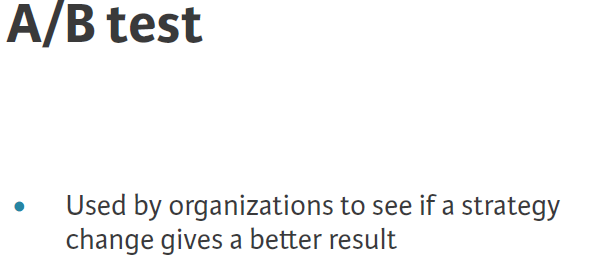

**Null hypothesis**

*The click-through rate is not affected by the
redesign*

In [565]:
clickthrow_A=np.ones(500)
clickthrow_B=np.zeros(500)

In [566]:
def diff_frac(data_1,data_2):
  frac_A=np.sum(data_1)/len(data_1)
  frac_B=np.sum(data_2)/len(data_2)

  return frac_B-frac_A

In [567]:
diff_frac_obs=diff_frac(clickthrow_A,clickthrow_B)
diff_frac_obs

-1.0

In [568]:
perm_replicates=draw_perm_reps(clickthrow_A,clickthrow_B,diff_frac,1000)

In [569]:
p=np.sum(perm_replicates <= diff_frac_obs)/len(perm_replicates)
p

0.0

**The vote for the Civil Rights Act in 1964**

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [570]:
dems=np.array([True]*153+[False]*91)
reps=np.array([True]*136+[False]*35)
print(dems,reps)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False Fa

In [571]:
def frac_yea_dems(dems,reps):
  frac=np.sum(dems)/len(dems)

  return frac

In [572]:
perm_replicates=draw_perm_reps(dems,reps,frac_yea_dems,10000)

In [573]:
p=np.sum(perm_replicates <= 153/244) / len(perm_replicates)
p

0.0001

**Test of correlation**

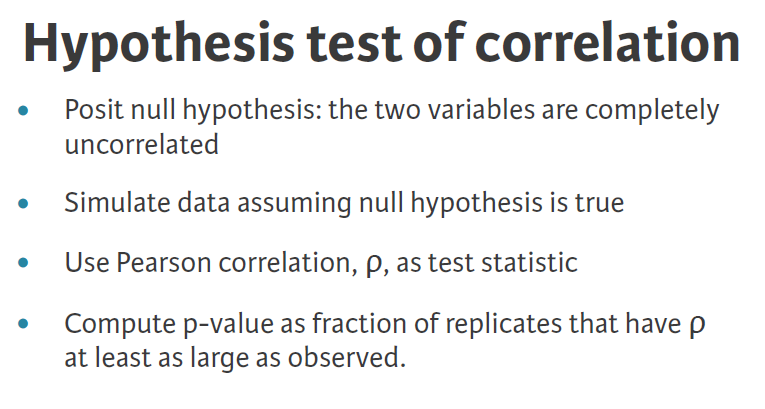

**A time-on-website analog**

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

Since you will be using your draw_perm_reps() function in this exercise, it may be useful to remind yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring back to the chapter 3 exercise in which you defined it.

In [574]:
df_nohitter.head(3)

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN


In [575]:
df_nohitter.set_index('date',inplace=True)

In [576]:
df_nohitter['diff']=df_nohitter.index

In [577]:
df_nohitter=df_nohitter['diff'].diff()

In [578]:
nht_dead = df_nohitter[df_nohitter.index < 19200101].values
nht_live = df_nohitter[df_nohitter.index > 19200101].values

In [579]:
nht_diff_obs=diff_of_means(nht_dead,nht_live)

In [580]:
perm_replicates=draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)

In [581]:
p=np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
p

0.0

**Hypothesis test on Pearson correlation**

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function pearson_r() that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already in your name space

In [582]:
r_obs = pearson_r(df_female['Iliteracy'], df_female['fertility'])

perm_replicates = np.empty(10000)

for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(df_female['Iliteracy'])
    perm_replicates[i] = pearson_r(illiteracy_permuted, df_female['fertility'])

p = np.sum(perm_replicates > r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [583]:
r_obs=pearson_r(df_all_states['total_votes'],df_all_states['dem_share'])

perm_replicates=np.empty(10000)

for i in range(10000):
  total_votes_permuted=np.random.permutation(df_all_states['total_votes'])
  perm_replicates[i]=pearson_r(total_votes_permuted,df_all_states['dem_share'])

p=np.sum(perm_replicates >= r_obs)/len(perm_replicates)
p

0.0

**Do neonicotinoid insecticides have unintended consequences?¶**

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [584]:
df_bee=pd.read_csv('/content/gdrive/MyDrive/bee_sperm.csv',header=3)
df_bee.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [585]:
control = df_bee[df_bee.Treatment == 'Control']['Alive Sperm Millions']
treated = df_bee[df_bee.Treatment == 'Pesticide']['Alive Sperm Millions']

In [586]:
x_control,y_control=ecdf(control)
x_treated,y_treated=ecdf(treated)

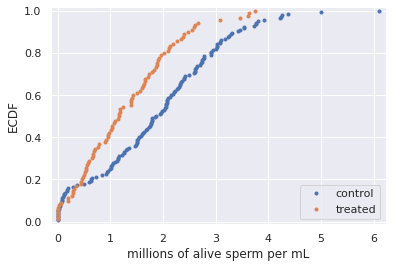

In [587]:
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')

plt.legend(('control', 'treated'), loc='lower right')
plt.margins(0.02)
plt.show()

**Bootstrap hypothesis test on bee sperm counts**

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

For your reference, the call signature for the draw_bs_reps() function you wrote in chapter 2 is draw_bs_reps(data, func, size=1).

In [588]:
diff_means=np.mean(control)-np.mean(treated)

mean_count = np.mean(np.concatenate((control, treated)))

In [589]:
control_shifted=control-np.mean(control)+mean_count
treated_shifted=treated-np.mean(treated)+mean_count

In [590]:
bs_reps_control=draw_reps(control_shifted,np.mean,10000)
bs_reps_treated=draw_reps(treated_shifted,np.mean,10000)

In [591]:
bs_replicates=bs_reps_control-bs_reps_treated

In [592]:
p=np.sum(bs_replicates >= diff_means) / len(bs_replicates)
p

0.0

# ***Chapter-5: Case Study***

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action. It's an exhilarating way to end the course!

In [593]:
df_1975=pd.read_csv('/content/gdrive/MyDrive/finch_beaks_1975.csv')
df_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [594]:
df_2012=pd.read_csv('/content/gdrive/MyDrive/finch_beaks_2012.csv')
df_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [595]:
df_1975['Year']=1975
df_2012['Year']=2012

In [596]:
df_2012.columns=df_1975.columns

In [597]:
df_finch=pd.concat([df_1975,df_2012],ignore_index=True)
df_finch.head()

,band,species,"Beak length, mm","Beak depth, mm",Year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [598]:
df_finch.shape

(651, 5)

In [599]:
df_finch.species.unique()

array(['fortis', 'scandens'], dtype=object)

In [600]:
bd_1975=df_finch[(df_finch.Year == 1975) & (df_finch.species == 'scandens')]['Beak depth, mm'].values
bl_1975=df_finch[(df_finch.Year == 1975) & (df_finch.species == 'scandens')]['Beak length, mm'].values
bd_2012=df_finch[(df_finch.Year == 2012) & (df_finch.species == 'scandens')]['Beak depth, mm'].values
bl_2012=df_finch[(df_finch.Year == 2012) & (df_finch.species == 'scandens')]['Beak length, mm'].values

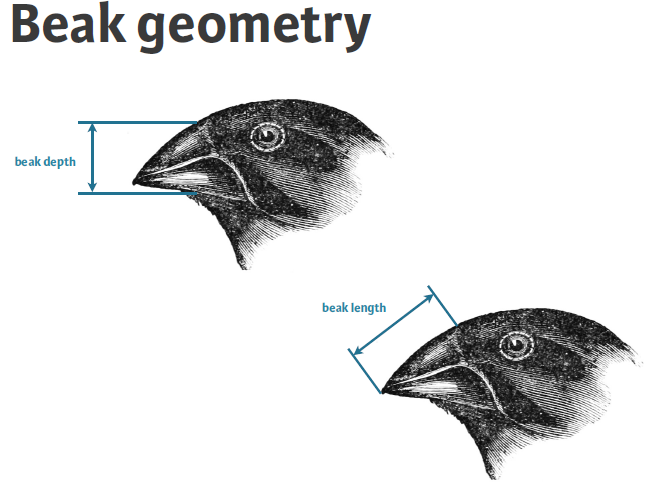




**Task**

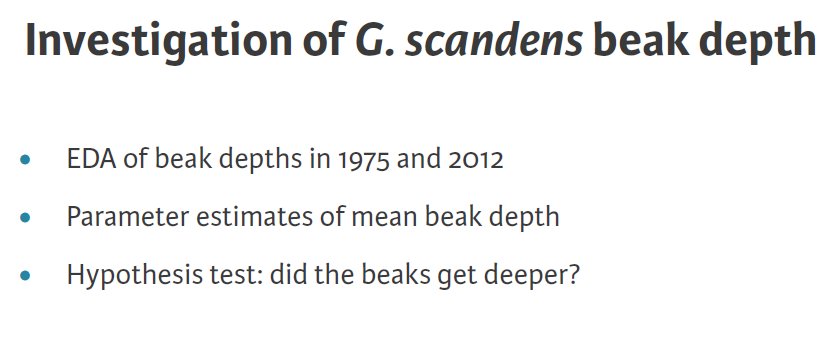

**EDA of beak depths of Darwin's finches**


EDA of beak depths of Darwin's finches
For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called df with columns 'year' and 'beak_depth'. The units of beak depth are millimeters (mm).

In [601]:
df_finch.head(2)

,band,species,"Beak length, mm","Beak depth, mm",Year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975


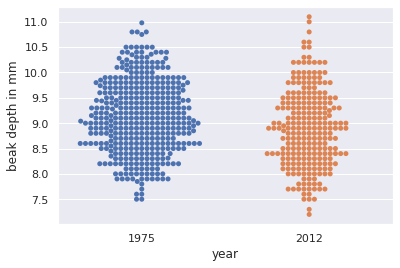

In [602]:
sns.swarmplot(x='Year',y='Beak depth, mm',data=df_finch)
plt.xlabel("year")
plt.ylabel("beak depth in mm")
plt.show()

*It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.*

**ECDFs of beak depths**

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays bd_1975 and bd_2012

In [603]:
x_1975,y_1975=ecdf(bd_1975)
x_2012,y_2012=ecdf(bd_2012)

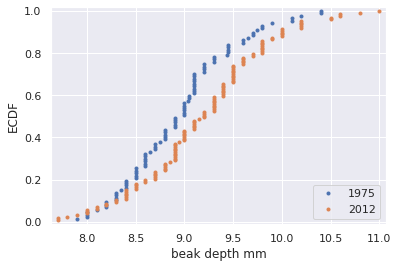

In [604]:
plt.plot(x_1975,y_1975,marker='.', linestyle='none')
plt.plot(x_2012,y_2012,marker='.', linestyle='none')
plt.margins(0.02)

plt.xlabel("beak depth mm")
plt.ylabel("ECDF")

plt.legend(('1975', '2012'), loc='lower right')
plt.show()

*The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.*

**Parameter estimates of beak depths**

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [605]:
diff_means=np.mean(bd_2012) - np.mean(bd_1975)
diff_means

0.22622047244094645

In [606]:
bs_replicates_1975=draw_reps(bd_1975,np.mean,1000)
bs_replicates_2012=draw_reps(bd_2012,np.mean,1000)

In [607]:
bs_replicates_diff=bs_replicates_2012 - bs_replicates_1975

In [608]:
conf_int=np.percentile(bs_replicates_diff,[2.5,97.5])
conf_int

array([0.06935171, 0.39704276])

In [609]:
print('difference of means =', diff_means, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06935171 0.39704276] mm


**Hypothesis test: Are beaks deeper in 2012?**

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [610]:
combined_mean=np.mean(np.concatenate((bd_1975,bd_2012)))

In [611]:
bd_1975_shifted=bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted=bd_2012 - np.mean(bd_2012) + combined_mean

In [612]:
bs_replicates_1975=draw_reps(bd_1975_shifted,np.mean,1000)
bs_replicates_2012=draw_reps(bd_2012_shifted,np.mean,1000)

In [613]:
bs_replicates_diff=bs_replicates_2012 - bs_replicates_1975

In [614]:
p=np.sum(bs_replicates_diff >= diff_means) / len(bs_replicates_diff)
p

0.005

In [615]:
print('p =', p)

p = 0.005


*We get a p-value of 0.003, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.*

**EDA of beak length and depth**

The beak length data are stored as bl_1975 and bl_2012, again with units of millimeters (mm). You still have the beak depth data stored in bd_1975 and bd_2012. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

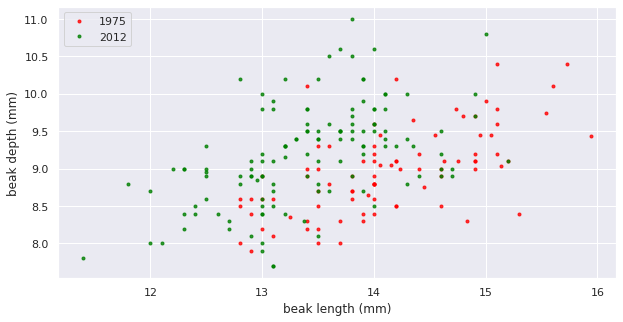

In [616]:
plt.figure(figsize=(10,5))
plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',color='red',alpha=0.8)
plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',color='green',alpha=0.8)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975','2012'), loc='upper left')
plt.show()

*In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.*

**Linear regressions**

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [617]:
slope_1975,intercept_1975=np.polyfit(bl_1975,bd_1975,1)
slope_2012,intercept_2012=np.polyfit(bl_2012,bd_2012,1)

In [618]:
slope_1975_bs,intercept_1975_bs=draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
slope_2012_bs,intercept_2012_bs=draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

In [619]:
slope_1975_bs_conf_int=np.percentile(slope_1975_bs,[2.5,97.5])
intercept_1975_bs_conf_int=np.percentile(intercept_1975_bs,[2.5,97.5])
slope_2012_bs_conf_int=np.percentile(slope_2012_bs,[2.5,97.5])
intercept_2012_bs_conf_int=np.percentile(intercept_2012_bs,[2.5,97.5])

In [620]:
print('1975: slope =',slope_1975,'conf int =',slope_1975_bs_conf_int)

print('1975: intercept =',intercept_1975,'conf int =',intercept_1975_bs_conf_int)

print('2012: slope = ',slope_2012,'conf int =',slope_2012_bs_conf_int)

print('2012: intercept =', intercept_2012,'conf int =', intercept_2012_bs_conf_int)

1975: slope = 0.4652051691605937 conf int = [0.35018771 0.58590206]
1975: intercept = 2.3908752365842263 conf int = [0.7053562  4.04163705]
2012: slope =  0.462630358835313 conf int = [0.32589952 0.59407337]
2012: intercept = 2.9772474982360198 conf int = [1.22204937 4.81148101]


*It looks like they have the same slope, but different intercepts*

**Displaying the linear regression results**

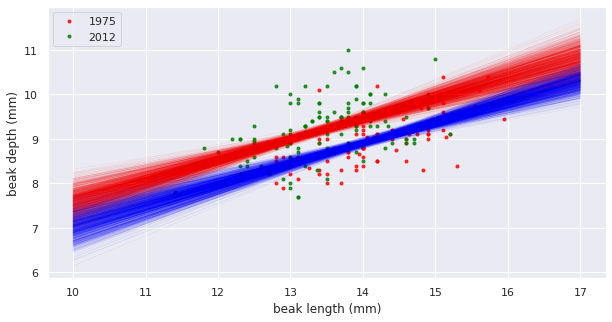

In [621]:
plt.figure(figsize=(10,5))
plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',color='red',alpha=0.8)
plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',color='green',alpha=0.8)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975','2012'), loc='upper left')

x=np.array([10,17])

for i in range(1000):
  plt.plot(x,slope_1975_bs[i]*x + intercept_1975_bs[i],linewidth=0.5,alpha=0.08,color='blue')
  plt.plot(x,slope_2012_bs[i]*x + intercept_2012_bs[i],linewidth=0.5,alpha=0.08,color='red')

plt.show()

**Beak length to depth ratio**

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [622]:
ratio_1975=bl_1975/bd_1975
ratio_2012=bl_2012/bd_2012

In [623]:
ratio_1975_mean=np.mean(ratio_1975)
ratio_2012_mean=np.mean(ratio_2012)

In [624]:
bs_replicates_ratio_1975=draw_reps(ratio_1975,np.mean,1000)
bs_replicates_ratio_2012=draw_reps(ratio_2012,np.mean,1000)

In [625]:
bs_replicates_ratio_1975_conf_int=np.percentile(bs_replicates_ratio_1975,[2.5,97.5])
bs_replicates_ratio_2012_conf_int=np.percentile(bs_replicates_ratio_2012,[2.5,97.5])

In [626]:
print('1975: mean ratio =',ratio_1975_mean,'conf int =',bs_replicates_ratio_1975_conf_int)
print('2012: mean ratio =',ratio_2012_mean,'conf int =',bs_replicates_ratio_2012_conf_int)

1975: mean ratio = 1.5788823771858533 conf int = [1.56306382 1.59505339]
2012: mean ratio = 1.4658342276847767 conf int = [1.44957751 1.4835508 ]


*The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.*

**EDA of heritability**

The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

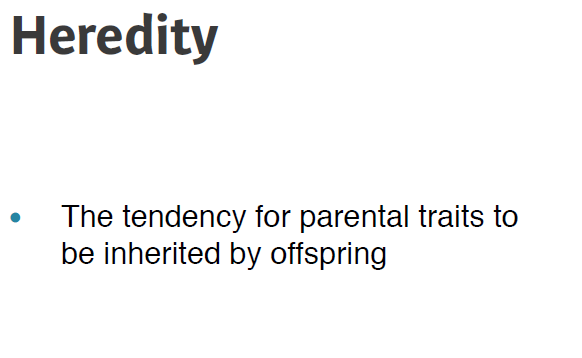

In [627]:
df_fortis=pd.read_csv('/content/gdrive/MyDrive/fortis_beak_depth_heredity.csv')
df_fortis.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [628]:
df_scandens=pd.read_csv('/content/gdrive/MyDrive/scandens_beak_depth_heredity.csv')
df_scandens.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


In [629]:
bd_parent_scandens=df_scandens.mid_parent.values
bd_offspring_scandens=df_scandens.mid_offspring.values
bd_offspring_fortis=df_fortis['Mid-offspr'].values
bd_parent_fortis=df_fortis[['Male BD', 'Female BD']].apply(np.mean,axis=1).values

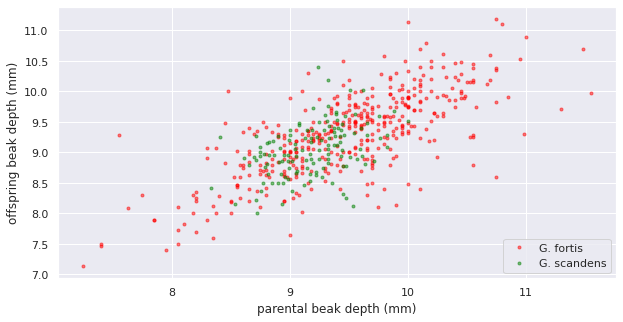

In [630]:
plt.figure(figsize=(10,5))

plt.plot(bd_parent_fortis,bd_offspring_fortis,marker='.',linestyle='none',color='red', alpha=0.5)
plt.plot(bd_parent_scandens,bd_offspring_scandens,marker='.',linestyle='none',color='green', alpha=0.5)

plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

plt.legend(('G. fortis', 'G. scandens'),loc='lower right')

plt.show()

*It appears as though there is a stronger correlation in G. fortisthan than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We’ll quantify this correlation next*

**Correlation of offspring and parental data**

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature draw_bs_pairs(x, y, func, size=1) that performs pairs bootstrap and computes a single statistic on pairs samples defined.The statistic of interest is computed by calling func(bs_x, bs_y). In the next exercise, you will use pearson_r for func.

In [631]:
def draw_bs_pairs(x,y,func,size=1):
  inds=np.arange(len(x))

  bs_replicates=np.empty(size)

  for i in range(size):
    bs_inds=np.random.choice(inds,len(inds))
    bs_x,bs_y=x[bs_inds],y[bs_inds]

    bs_replicates[i]=func(bs_x,bs_y)
  
  return bs_replicates

**Pearson correlation of offspring and parental data**

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [632]:
r_scandens=pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis=pearson_r(bd_parent_fortis,bd_offspring_fortis)

In [633]:
bs_replicates_r_scandens=draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,pearson_r,1000)
bs_replicates_r_fortis=draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,pearson_r,1000)

In [634]:
bs_replicates_r_scandens_conf_int=np.percentile(bs_replicates_r_scandens,[2.5,97.5])
bs_replicates_r_fortis_conf_int=np.percentile(bs_replicates_r_fortis,[2.5,97.5])

In [635]:
print('G. scandens:',r_scandens,bs_replicates_r_scandens_conf_int)
print('G. fortis:',r_fortis,bs_replicates_r_fortis_conf_int)

G. scandens: 0.4117063629401258 [0.26544693 0.54303058]
G. fortis: 0.7283412395518487 [0.66887217 0.78308376]


*It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.*

**Measuring heritability**

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [636]:
def heritability(parents,offspring):
  cov_mat=np.cov(parents,offspring)

  return cov_mat[0,1] / cov_mat[0,0]

In [637]:
heritability_fortis=heritability(bd_parent_fortis,bd_offspring_fortis)
heritability_scandens=heritability(bd_parent_scandens,bd_offspring_scandens)

In [638]:
heritability_fortis_rep=draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,heritability,1000)
heritability_scandens_rep=draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,heritability,1000)

In [639]:
heritability_fortis_rep_conf_int=np.percentile(heritability_fortis_rep,[2.5,97.5])
heritability_scandens_rep_conf_int=np.percentile(heritability_scandens_rep,[2.5,97.5])

In [640]:
print('G. scandens:',heritability_scandens,heritability_scandens_rep_conf_int)
print('G. fortis:',heritability_fortis,heritability_fortis_rep_conf_int)

G. scandens: 0.5485340868685982 [0.34542494 0.74556241]
G. fortis: 0.7229051911438159 [0.64487486 0.7894093 ]


*Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.*

**Is beak depth heritable at all in G. scandens?**

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [641]:
perm_replicates=np.empty(1000)

In [642]:
for i in range(1000):
  bd_parent_scandens_permuted=np.random.permutation(bd_parent_scandens)
  perm_replicates[i]=heritability(bd_parent_scandens_permuted,bd_offspring_scandens)

In [643]:
p=np.sum(perm_replicates >= heriability_scandens) / len(perm_replicates)

In [644]:
print('p-val =', p)

p-val = 0.0


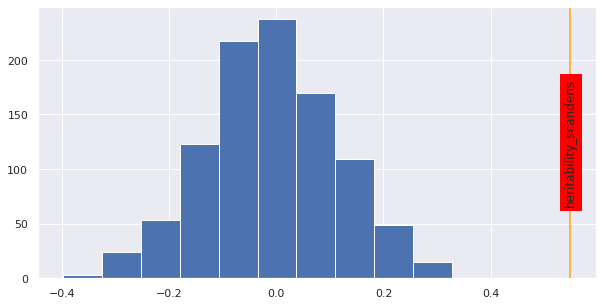

In [645]:
plt.figure(figsize=(10,5))
plt.hist(perm_replicates)
plt.axvline(x=heriability_scandens,color='orange')
plt.text(heriability_scandens,125,'heritability_scandens',ha='center',va='center',rotation='vertical',backgroundcolor='red')
plt.show()

*You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.*

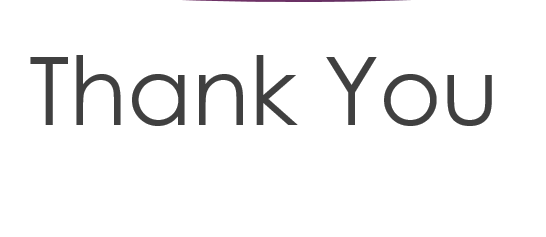